#### Уровень 0
Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

In [1]:
import numpy as np
a = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, -1]])
np.dot(a, np.transpose(a))

matrix([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

b) верхнетреугольная, ортогональная:

любая диагональная матрица, где элементы могут быть равны 1 или -1

c) нижнетреугольная, ортогональная:

любая диагональная матрица, где элементы могут быть равны 1 или -1

d) матрица, у которой определитель = 1, и все элементы не равны 0:

In [2]:
d = np.matrix([[0.96, -0.28], [0.28, 0.96]])
np.linalg.inv(d)

matrix([[ 0.96,  0.28],
        [-0.28,  0.96]])

Найдите собственные значения и собственные вектора матрицы m

In [3]:
m = np.array([
    [2, 2],
    [1, 3]
])
print(m)

[[2 2]
 [1 3]]


In [4]:
np.linalg.eigh(m)

(array([1.38196601, 3.61803399]),
 array([[-0.85065081,  0.52573111],
        [ 0.52573111,  0.85065081]]))

#### Уровень 1:
Найдите спектральное разложение матрицы m

In [5]:
m = np.array([
    [1, 2],
    [2, 3]
])
print(m)

[[1 2]
 [2 3]]


In [6]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [7]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE. *

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X, y = load_digits(return_X_y=True)

In [9]:
errors = []
n_comp = list(range(1, 64))
for n in n_comp:
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)
    X_reconstracted = pca.inverse_transform(X_reduced)
    errors.append(mean_squared_error(X, X_reconstracted))

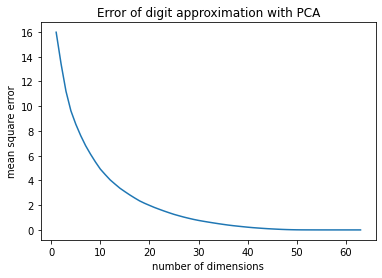

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_comp, errors)
ax.set_xlabel('number of dimensions')
ax.set_ylabel('mean square error')
t = plt.title('Error of digit approximation with PCA')